# Barcode detector


Barcode detector consists of the following steps:
1. reading the image
2. comverting the image into grayscale
3. calculating X and Y gradients
4. substracting the y-gradient for x-gradient
5. Adjusting the scale to absolute value
6. blurring
7. Morphology
8. erosion and dialation for sharpness.
9. Finding Countour 
10. Displaying the Countour with blue colour Box.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# load the image and convert it to grayscale
image = cv2.imread("Barcodes.png")
# converting the image into grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

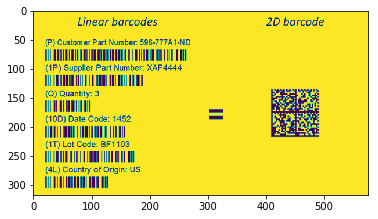

In [2]:
plt.imshow(gray)

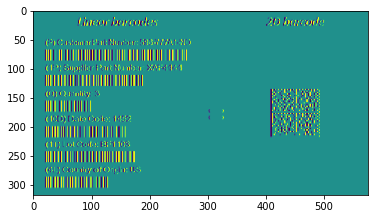

In [3]:
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
plt.imshow(gradX)

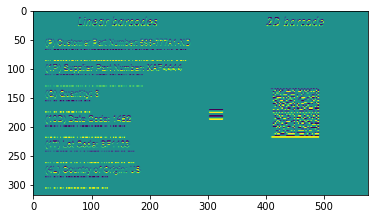

In [4]:
plt.imshow(gradY)

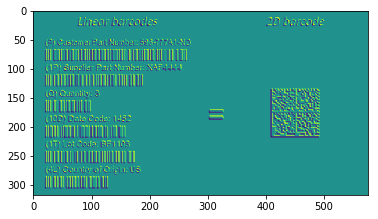

In [5]:
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
plt.imshow(gradient)

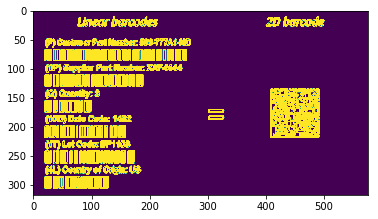

In [6]:
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)

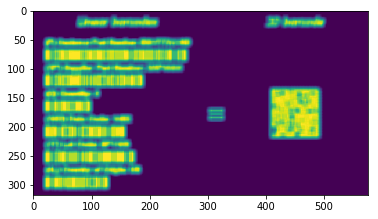

In [7]:
# blur and threshold the image to reduce noise.
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
plt.imshow(blurred)

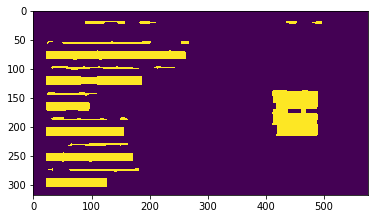

In [8]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

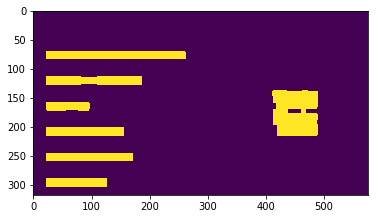

In [9]:
# perform a series of erosions and dilations for smoothness.
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)
plt.imshow(closed)

In [10]:

# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
                    	cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
print(c)


[[[414 136]]

 [[412 138]]

 [[412 146]]

 [[413 147]]

 [[413 157]]

 [[417 157]]

 [[419 159]]

 [[419 167]]

 [[417 169]]

 [[413 169]]

 [[413 196]]

 [[420 196]]

 [[421 197]]

 [[421 214]]

 [[489 214]]

 [[490 213]]

 [[490 195]]

 [[489 194]]

 [[489 187]]

 [[490 186]]

 [[490 178]]

 [[489 177]]

 [[489 176]]

 [[471 176]]

 [[470 175]]

 [[470 169]]

 [[471 168]]

 [[472 168]]

 [[473 167]]

 [[489 167]]

 [[489 166]]

 [[490 165]]

 [[490 138]]

 [[489 137]]

 [[473 137]]

 [[472 136]]

 [[464 136]]

 [[463 137]]

 [[437 137]]

 [[436 136]]]


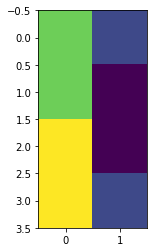

In [11]:
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
plt.imshow(box)

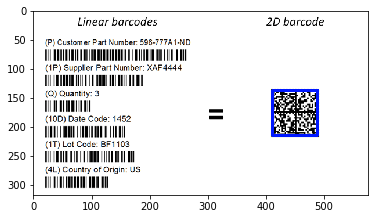

In [14]:
# draw a bounding box arounded the detected barcode and display the
# image
cv2.drawContours(image, [box], -1, (0, 24, 255), 3)
plt.imshow(image)

We can see that the largest Bardoce is detected. This system can be used to detect barcode automatically through the system and do the further processing .